In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../resources/dataset.csv")
data = data.drop(['Unnamed: 0'], axis=1)
corr = data.corr(numeric_only=1)

# Introduction au dataset
Nous allons utiliser un set de données "Spotify Tracks Dataset" qui provient du site [Kaggle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?select=dataset.csv).

# Taille du dataset

In [2]:
print("Nombre de ligne : ", len(data))
print("Nombre de colonne : ", len(data.columns))

Nombre de ligne :  114000
Nombre de colonne :  20


# Description des colonnes
### Les colonnes principales sont :
##### Les colonnes non numériques :
- **track_id** : l'identifiant de la musique
- **track_name** : le nom de la musique
- **artists** : le ou les artistes de la musique
- **album_name** : le nom de l'album de la musique
- **explicit** : la présence de parole explicite dans la musique (0 = pas explicite, 1 = explicite)
- **time_signature** : la signature temporelle de la musique (4 = 4/4, 3 = 3/4, etc.)


##### Les colonnes numériques :
- **danceability** : la danseabilité de la musique, c'est à dire la facilité à danser sur la musique (0.0 = pas danseable, 1.0 = très danseable)
- **energy** : l'énergie de la musique, c'est à dire la puissance de la musique (0.0 = faible, 1.0 = très énergique)
- **key** : la tonalité de la musique (0 = C, 1 = C♯/D♭, 2 = D, et ainsi de suite)
- **loudness** : le volume de la musique en dB (0 = faible, 1 = très fort)
- **mode** : le mode de la musique (0 = mineur, 1 = majeur)
- **speechiness** : la présence de parole dans la musique (0.0 = pas de parole, 1.0 = beaucoup de parole)
- **acousticness** : la présence d'instruments acoustiques dans la musique (0.0 = pas d'instruments acoustiques, 1.0 = beaucoup d'instruments acoustiques)
- **instrumentalness** : la présence d'instruments dans la musique (0.0 = pas d'instruments, 1.0 = beaucoup d'instruments)
- **liveness** : la présence de public dans la musique (0.0 = pas de public, 1.0 = beaucoup de public)
- **valence** : la positivité de la musique (0.0 = négative, 1.0 = positive)
- **tempo** : la vitesse de la musique en BPM (battements par minute)
- **duration_ms** : la durée de la musique en millisecondes
- **popularity** : la popularité de la musique (0 = pas populaire, 100 = très populaire


Dans cette analyse nous allons nous intéresser à la danseabilité de la musique, c'est à dire la facilité à danser sur la musique (0.0 = pas danseable, 1.0 = très danseable).

Pour cela nous allons nous intéresser à la correlation entre la danseabilité et les autres propriétés de la musique, et notemment au données numériques.

# Analyse des données
#### Une heatmap de correlation

<Axes: >

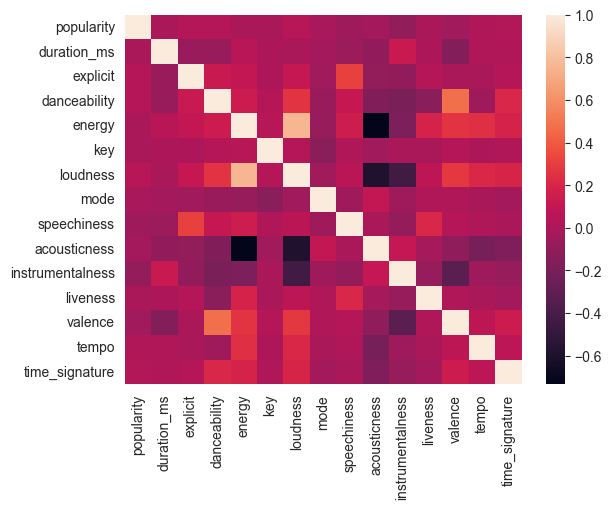

In [3]:
sns.heatmap(corr)

##### Analyse
Sur cette Heatmap on voit directement une forte correlation entre la valence et la danceability

On voit aussi d'autres propriétés un peu plus regroupée notemment dans le négatif.

#### Correlation des données numériques

In [4]:
corr['danceability'].sort_values()

instrumentalness   -0.185606
acousticness       -0.171533
liveness           -0.131617
duration_ms        -0.073426
mode               -0.069219
tempo              -0.050450
popularity          0.035448
key                 0.036469
speechiness         0.108626
explicit            0.122507
energy              0.134325
time_signature      0.207218
loudness            0.259077
valence             0.477341
danceability        1.000000
Name: danceability, dtype: float64

##### Analyse

On peut voir qu'il y a une plus forte correlation entre la valence et la danceability ce qui confirme notre impression sur la heatmap.

On peut aussi exclure
- la popularité,
-  la tonnalité,
- le tempo,
- le mode
- la durée

Qui eux, ont peu d'influence sur la danceability au vu de leur faible taux de correlation. (inférieur à 0.1)

In [5]:
remove = ['popularity', 'key', 'tempo', 'mode', 'duration_ms']
data = data.drop(remove , axis=1)

#### Nous allons maintenant nous intéresser aux musiques qui ont une danceability supérieure à 0.7

In [6]:
colsToRemove = ['time_signature', 'loudness', 'danceability']

dataHighDanceability = data[data['danceability'] > 0.7]
dataLowDanceability = data[data['danceability'] < 0.7]

dataHighDanceabilityDesc = dataHighDanceability.describe().drop(colsToRemove, axis=1)
dataLowDanceabilityDesc = dataLowDanceability.describe().drop(colsToRemove, axis=1)

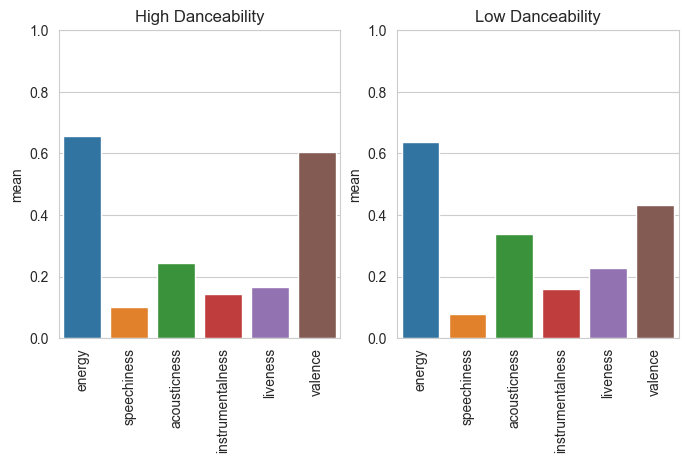

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
sns.barplot(x=dataHighDanceabilityDesc.columns, y=dataHighDanceabilityDesc.loc['mean'], ax=ax1)
sns.barplot(x=dataLowDanceabilityDesc.columns, y=dataLowDanceabilityDesc.loc['mean'],ax=ax2)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)

ax1.set_title('High Danceability')
ax2.set_title('Low Danceability')

plt.show()


##### Analyse
Ce qu'on peut déduire de ces deux histogrammes c'est que les musiques qui ont une danceability supérieure à 0.7 ont :
- une valence largement plus élevée,
- une acousticness plus faible
- une liveness plus faible

On remarque donc que l'energy, le speachness et l'instrumentalness ont moins d'influence sur la danceability.

# Conclusion

Si on devait conclure ont pourrait dire que si j'ai une musique qui:
- a une positivité élevée,
- n'est pas acoustique,
- n'est pas live,
- n'est pas moins énergique que la plupart des musiques

Elle a de grande chance d'avoir une danceability élevée.